In [62]:
 import sys
 print(sys.executable) 

/opt/anaconda3/bin/python


In [63]:
import numpy as np
import pandas as pd


In [64]:
class dataCleaning:
    def folderToDfs(folderpath):
        """returns list of dataframes from an input folder"""
        files = os.listdir(folderpath)
        df_list = []
        for file in files:
            if not file.startswith('.'):
                temp_df = pd.read_csv(folderpath+'/'+file)
                df_list.append(temp_df)
        return df_list
    
    def renameCols(dfs, colNames):
        """Takes list of data frames and dictionary of replacement colNames and and renames specifies columns"""
        for df in dfs:
            df.rename(columns=colNames, inplace=True)
    
    #     print(df.columns)
    def combineVertically(dfs):
        """Takes list of dataframes and returns a single dataframe of dfs stacked vertically"""
        stack = pd.concat(dfs, axis=0)
        stack['Date'] = pd.to_datetime(stack['Date'])
        return stack.sort_values('Date')

    def cleanedDailyAvg(dataFrame):
        """Takes a data frame. Averages variables by day"""
        temp = dataFrame[dataFrame['pH_total_scale']> 0]
        return temp.groupby(['Date']).mean()


In [65]:
ME_dfs = dataCleaning.folderToDfs('data/ME')
GA_dfs = dataCleaning.folderToDfs('data/GA')
FL_dfs = dataCleaning.folderToDfs('data/FL')



# Maine 

<AxesSubplot:xlabel='Date'>

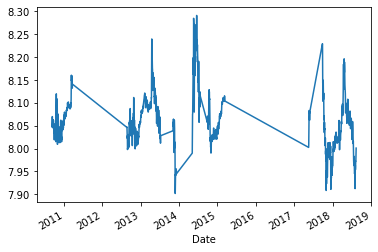

In [71]:

columns = {
    "pH_SW":"pH_total_scale",
    "pH_SW (Total Scale)":"pH_total_scale",
    "pH (total scale)":"pH_total_scale"
            }
dataCleaning.renameCols(ME_dfs, columns)
ME_DF = dataCleaning.combineVertically(ME_dfs)



ME_DF_avg = dataCleaning.cleanedDailyAvg(ME_DF)
ME_DF_avg['pH_total_scale'].plot()



In [67]:
# ME_DF['Date'] = pd.to_datetime(ME_DF['Date'])
# ME_DF.sort_values('Date')
# ME_DF

# Georgia

<AxesSubplot:xlabel='Date'>

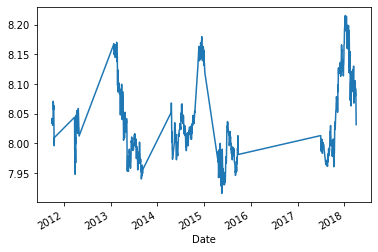

In [73]:
# all the pH variables seem to have the same name
columns = {"pH (total scale)":"pH_total_scale"}

dataCleaning.renameCols(GA_dfs, columns)
GA_DF = dataCleaning.combineVertically(GA_dfs)
GA_DF_AVG = dataCleaning.cleanedDailyAvg(GA_DF)
GA_DF_AVG['pH_total_scale'].plot()

In [69]:
# This is how I can filter by a particular variable 
# ME_dfs[0][ME_dfs[0]['pH_SW'] > 0]

# Florida

<AxesSubplot:xlabel='Date'>

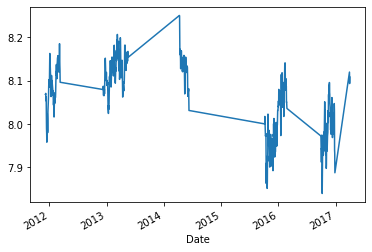

In [76]:
columns = {"pH (total scale)":"pH_total_scale",
          "pH_SW":"pH_total_scale",
          "pH SW":"pH_total_scale",
          "pH_Total_Scale":"pH_total_scale"}

dataCleaning.renameCols(FL_dfs, columns)
FL_DF = dataCleaning.combineVertically(FL_dfs)
FL_DF_AVG = cleanedDailyAvg(FL_DF)

FL_DF_AVG["pH_total_scale"].plot()